In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
duration = 1
cycles = 5
f = 1000
fs = 48000
T = 1/f
plotDur = cycles*T
precision = 20
totalSamples = 48000
five_cycles_samples = cycles*int(fs/f)

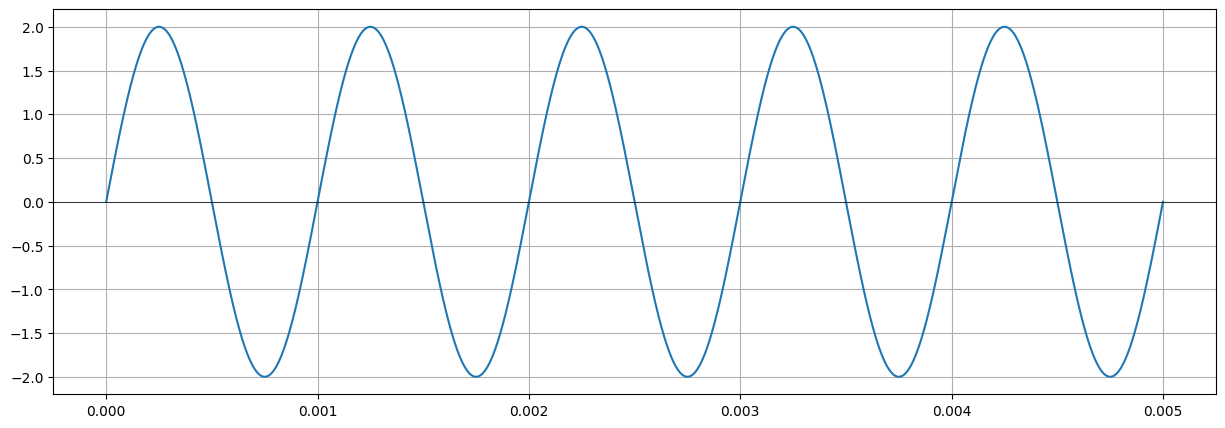

In [6]:
x = np.linspace(0,plotDur,totalSamples)
y = 2*np.sin(2*np.pi*f*x)

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.grid(True)
plt.axhline(y=0,color='k',linestyle='-',linewidth=0.5)
plt.show()

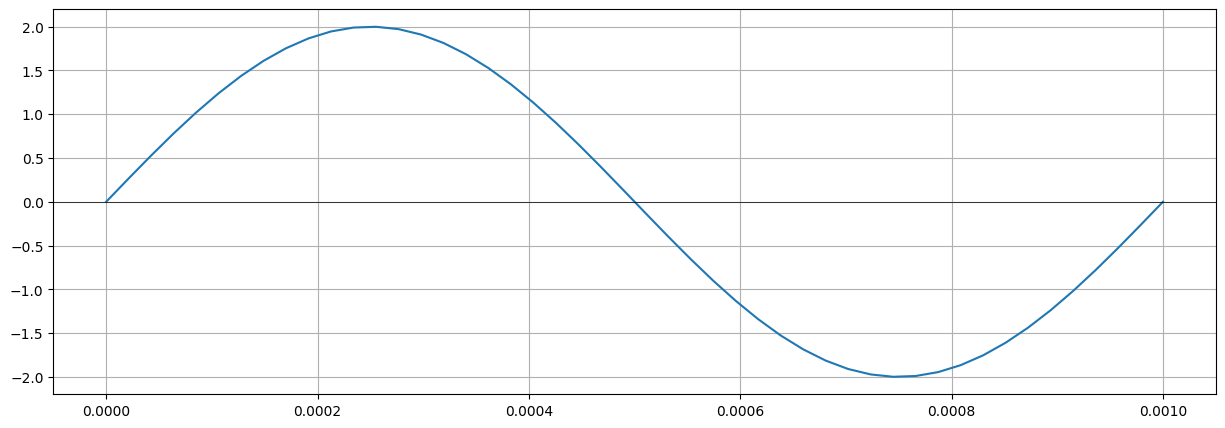

In [7]:
x_o = np.linspace(0,plotDur/cycles,48)
y = 2*np.sin(2*np.pi*f*x_o)
plt.figure(figsize=(15,5))
plt.plot(x_o,y)
plt.grid(True)
plt.axhline(y=0,color='k',linestyle='-',linewidth=0.5)
plt.show()

In [8]:
Ts = 1/fs
def sampleVal(n):
  val = 2*np.sin(2*np.pi*f*n*Ts)
  return round(val,precision)


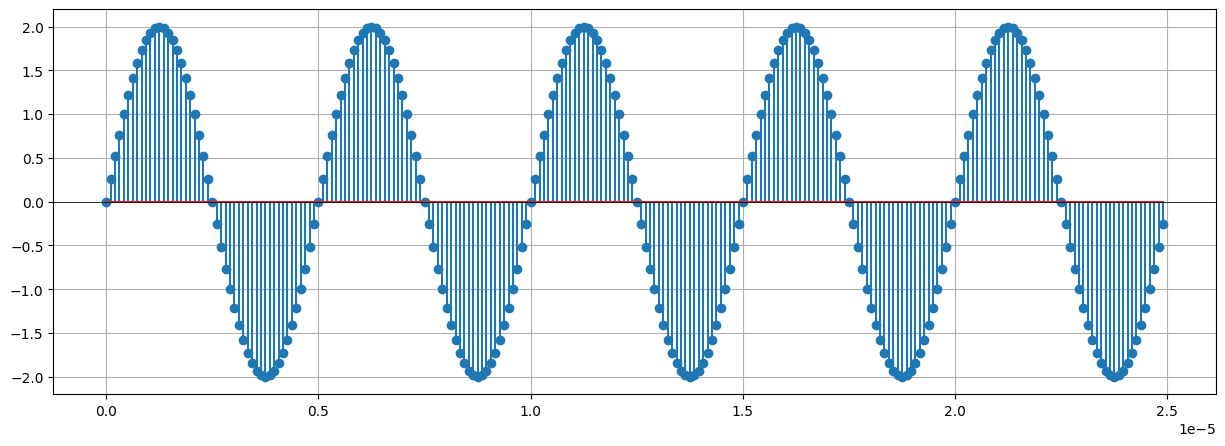

In [9]:
samples = []
for i in range(totalSamples):
  sample = sampleVal(i) 
  samples.append(sample)
samples = np.array(samples)

np.savetxt("samples.txt",samples)

plt.figure(figsize=(15,5))
plt.stem(x[:five_cycles_samples],samples[:five_cycles_samples])
plt.grid(True)
plt.axhline(y=0,color='k',linestyle='-',linewidth=0.5)
plt.show()


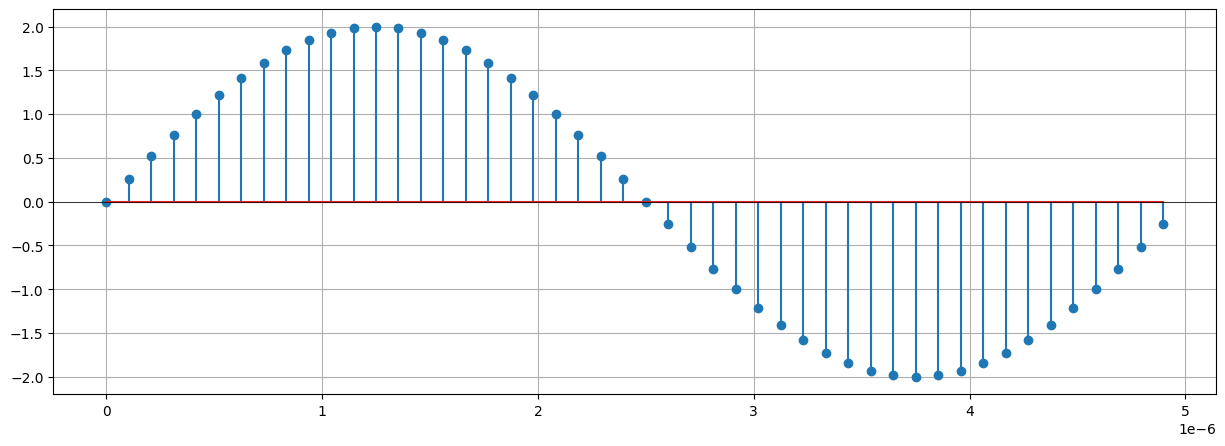

In [10]:
plt.figure(figsize=(15,5))
one_cycle_samples = int(five_cycles_samples/cycles)
plt.stem(x[:one_cycle_samples],samples[:one_cycle_samples])
plt.grid(True)
plt.axhline(y=0,color='k',linestyle='-',linewidth=0.5)
plt.show()

In [11]:
def round_to_int(num):
    int_num = int(num) 
    frac = abs(num - int_num) 
    if frac >= 0.5:
        return int_num + 1 if num >= 0 else int_num - 1
    return int_num

def fixedPoint(num, m, n):
  scale = 2**n
  fixed_int = round_to_int(num*scale)
  quantized = fixed_int/scale
  return quantized



In [12]:
def quantize(samples,m,n):
  arr = []
  for i in range(len(samples)):
    arr.append(fixedPoint(samples[i],m,n))
  arr = np.array(arr)
  return arr 

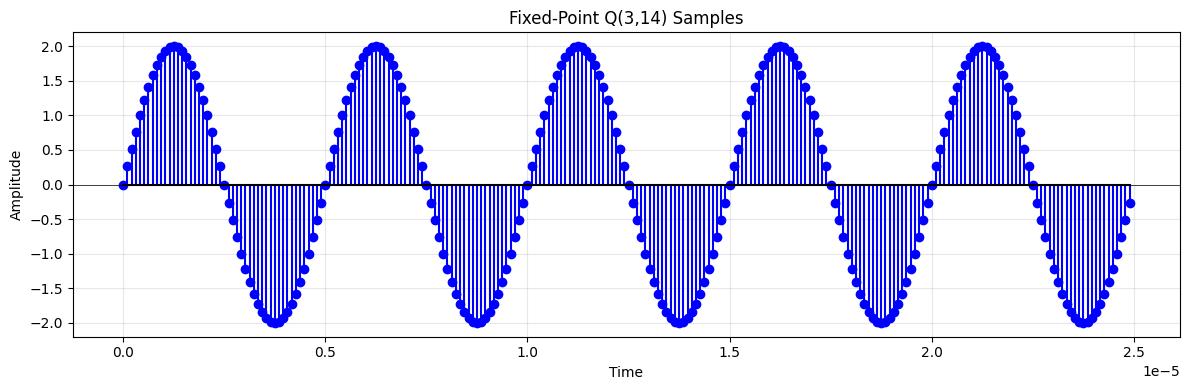

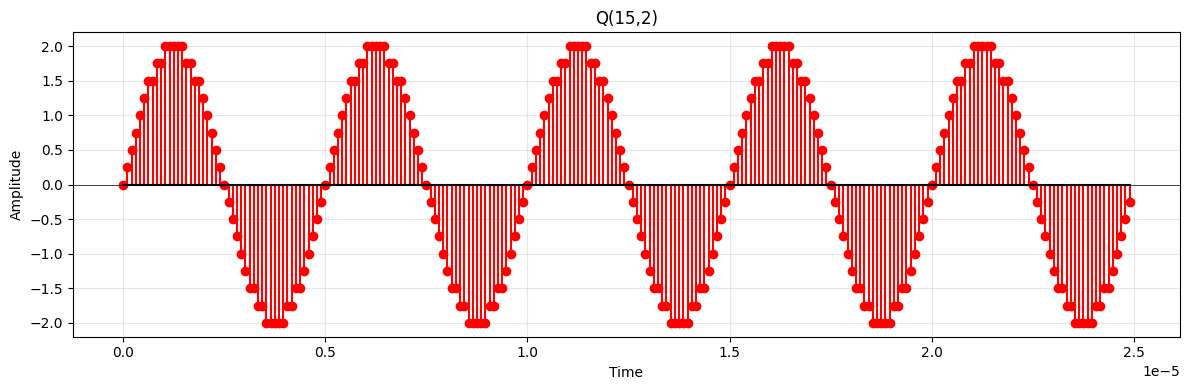

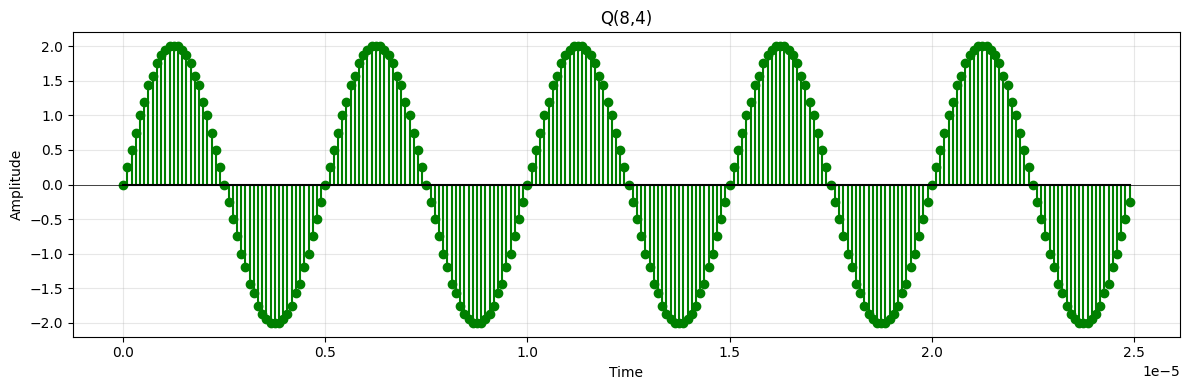

In [13]:
q_3_14 = quantize(samples,3,14)
q_15_2 = quantize(samples,15,2)
q_8_4 = quantize(samples,8,4)

import matplotlib.pyplot as plt

# Plot 1: Q(2,14)
plt.figure(figsize=(12, 4))
plt.stem(x[:five_cycles_samples], q_3_14[:five_cycles_samples], 
         linefmt='b-', markerfmt='bo', basefmt='k-')
plt.title('Fixed-Point Q(3,14) Samples')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Q(14,2)
plt.figure(figsize=(12, 4))
plt.stem(x[:five_cycles_samples], q_15_2[:five_cycles_samples], 
         linefmt='r-', markerfmt='ro', basefmt='k-')
plt.title('Q(15,2)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 3: Q(8,4)
plt.figure(figsize=(12, 4))
plt.stem(x[:five_cycles_samples], q_8_4[:five_cycles_samples], 
         linefmt='g-', markerfmt='go', basefmt='k-')
plt.title('Q(8,4)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [14]:
def errors(original,quantized):
  return original-quantized

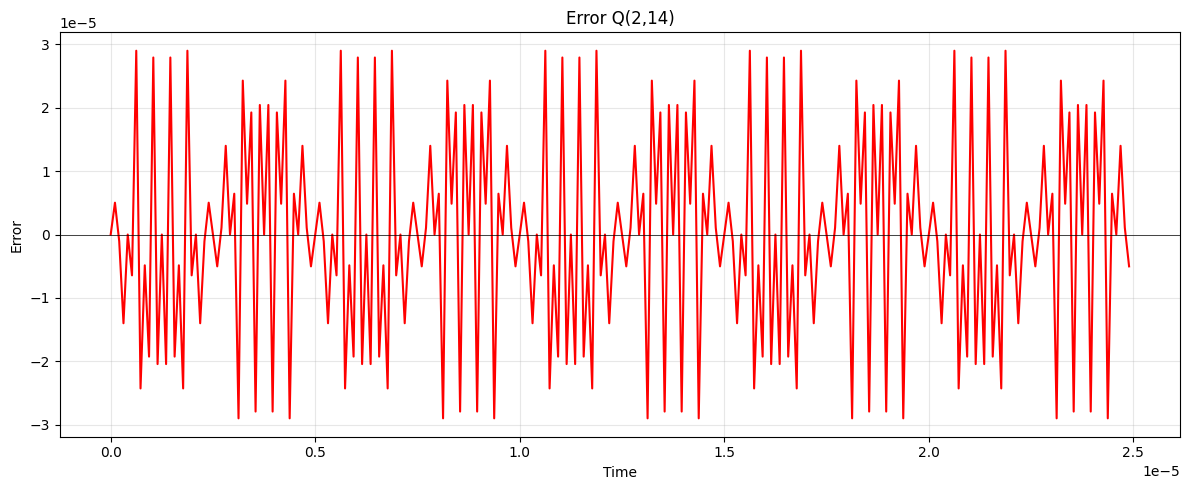

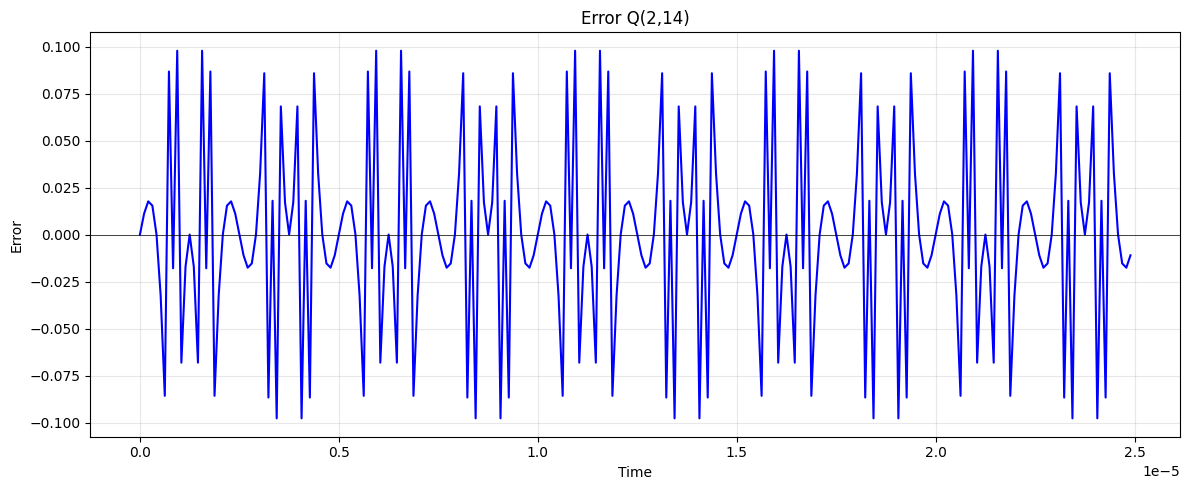

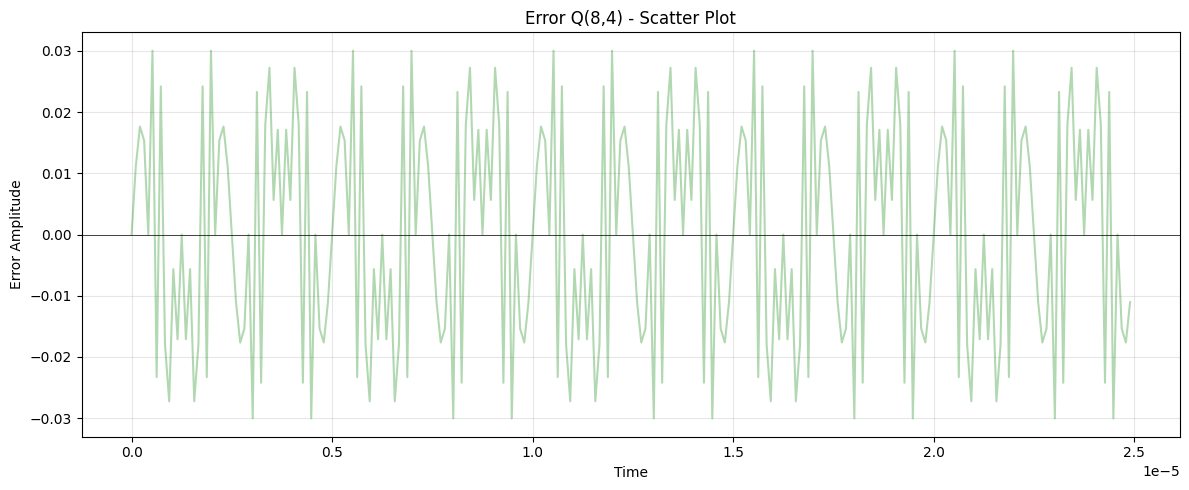

In [19]:
err_3_14 = errors(samples,q_3_14)
err_15_2 = errors(samples,q_15_2)
err_8_4 = errors(samples,q_8_4)

# Plot 1: Error Q(2,14) - Scatter
plt.figure(figsize=(12, 5))
plt.plot(x[:five_cycles_samples], err_3_14[:five_cycles_samples], 'r-', linewidth=1.5)
plt.title('Error Q(2,14)')
plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 2: Error Q(14,2) - Scatter
plt.figure(figsize=(12, 5))
plt.plot(x[:five_cycles_samples] ,err_15_2[:five_cycles_samples], 'b-', linewidth=1.5)
plt.title('Error Q(2,14)')
plt.xlabel('Time')
plt.ylabel('Error')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot 3: Error Q(8,4) - Scatter
plt.figure(figsize=(12, 5))
plt.plot(x[:five_cycles_samples], err_8_4[:five_cycles_samples], 'g-', alpha=0.3)
plt.title('Error Q(8,4) - Scatter Plot')
plt.xlabel('Time')
plt.ylabel('Error Amplitude')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

In [26]:
def sqnr(original,error):
  signalPower = np.mean(original**2)
  noisePower = np.mean(error**2)
  return signalPower/noisePower
def sqnrDb(original,error):
  return 10*np.log10(sqnr(original,error))

In [27]:
err_3_14_db = sqnrDb(samples,err_3_14)
err_15_2_db = sqnrDb(samples,err_15_2)
err_8_4_db = sqnrDb(samples,err_8_4)
print(err_3_14_db,err_15_2_db,err_8_4_db)

98.63665915863037 28.83039739656101 37.68711085779041


In [18]:
def load_data(name):
  data = np.loadtxt(f"{name}.txt")
  return data
def computeDifference(a1,a2):
  return a1-a2
